fixed acidity (주석산): 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
volatile acidity (아세트산): 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
chlorides : 염소화물: 와인의 염분량
free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
density : 밀도: 알코올 및 당 함량에 따라 변함
pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
alcohol : 와인의 알코올 함량 백분율
type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
quality : 맛으로 평가된 와인의 품질

양의 상관관계
알코올 : 단맛과 산성의 균형 유지
황산칼륨 : 와인의 향을 보존

음의 상관관계
구연산 : 와인의 산도를 높임(산성 보충제)
염화나트륨 : 고농도 짠맛
총 이산화황 : 성분이 많으면 포도주와 와인의 자연적인 향을 막음
아세트산 : 강하면 불쾌한 식초향

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline


train = pd.read_csv('dataset/train.csv')
print(train.quality.unique())
train.head()

# 4,5,6,7,8  / 5개 클래스 존재

[6 7 5 8 4]


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [3]:
#결측치 확인인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


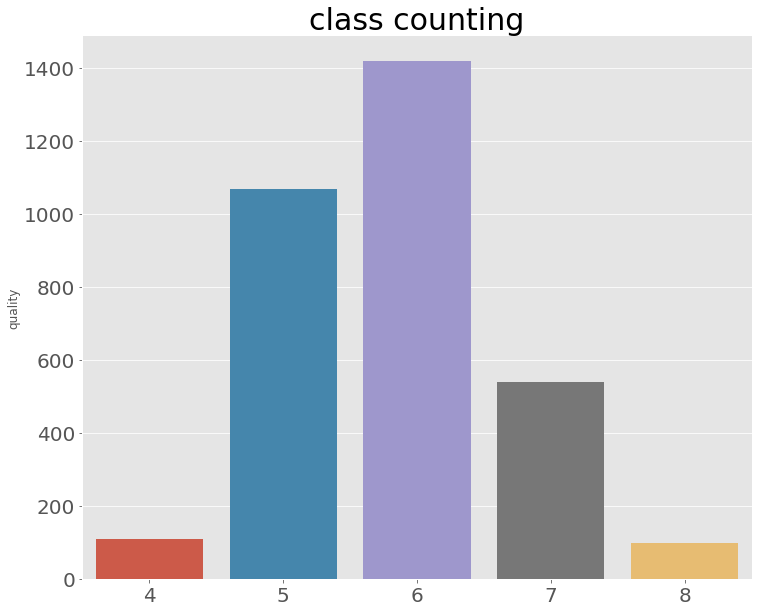

In [6]:
#클래스 분포 확인
counted_values = train['quality'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

# 적은 데이터 증강 or 따로 모델 생성성

In [7]:
qualities = {}

for i in range(4, 9):
    quality_description = train[train['quality'] == i].drop(['id', 'quality'], axis=1).describe()
    if i == 4:
        means = pd.DataFrame({i: quality_description.loc['mean']})
    else:
        mean = pd.DataFrame({i: quality_description.loc['mean']})
        means = pd.concat([means, mean], axis=1)
        
means = means.T

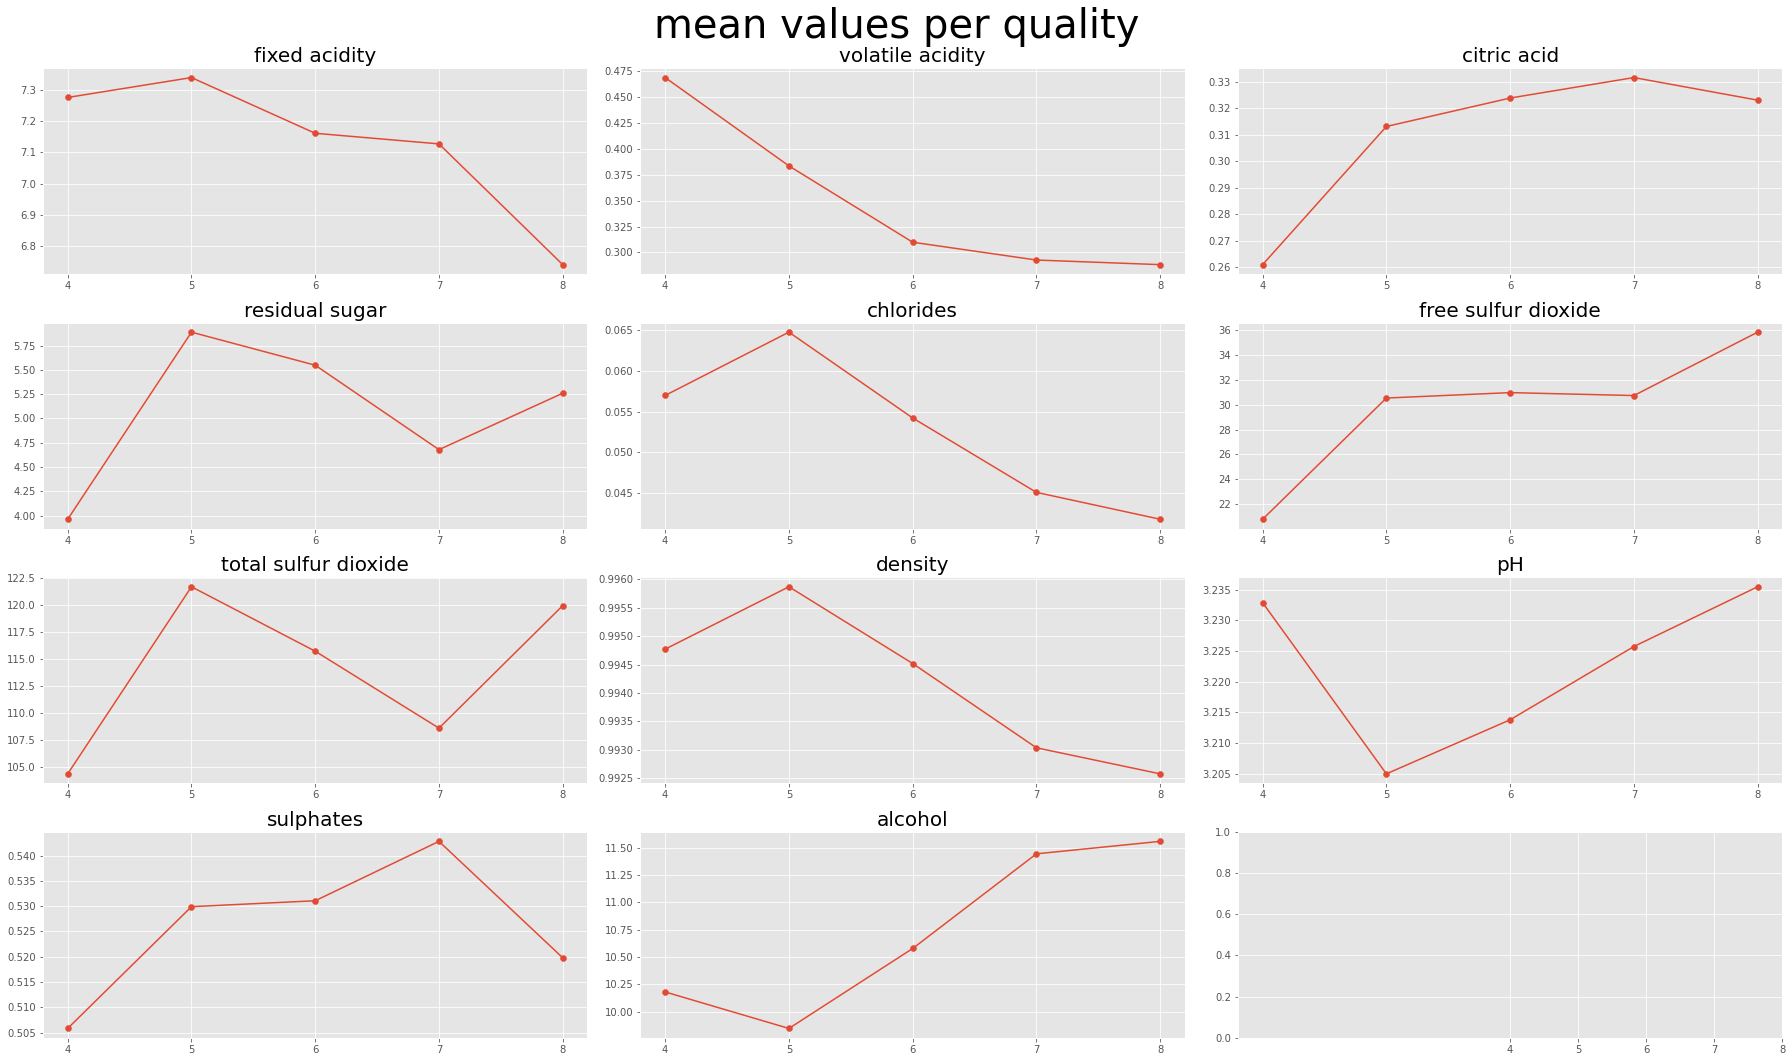

In [8]:
# 와인 품질별 feature의 평균값 

fig, axes = plt.subplots(4, 3, figsize=(25, 15))

fig.suptitle('mean values per quality', fontsize= 40)
for ax, col in zip(axes.flat, means.columns):
    ax.plot([4,5,6,7,8], means[col])
    ax.scatter([4,5,6,7,8], means[col])
    ax.set_title(col, fontsize=20)
plt.setp(axes, xticks=[4, 5, 6, 7, 8])
plt.tight_layout()
plt.show()

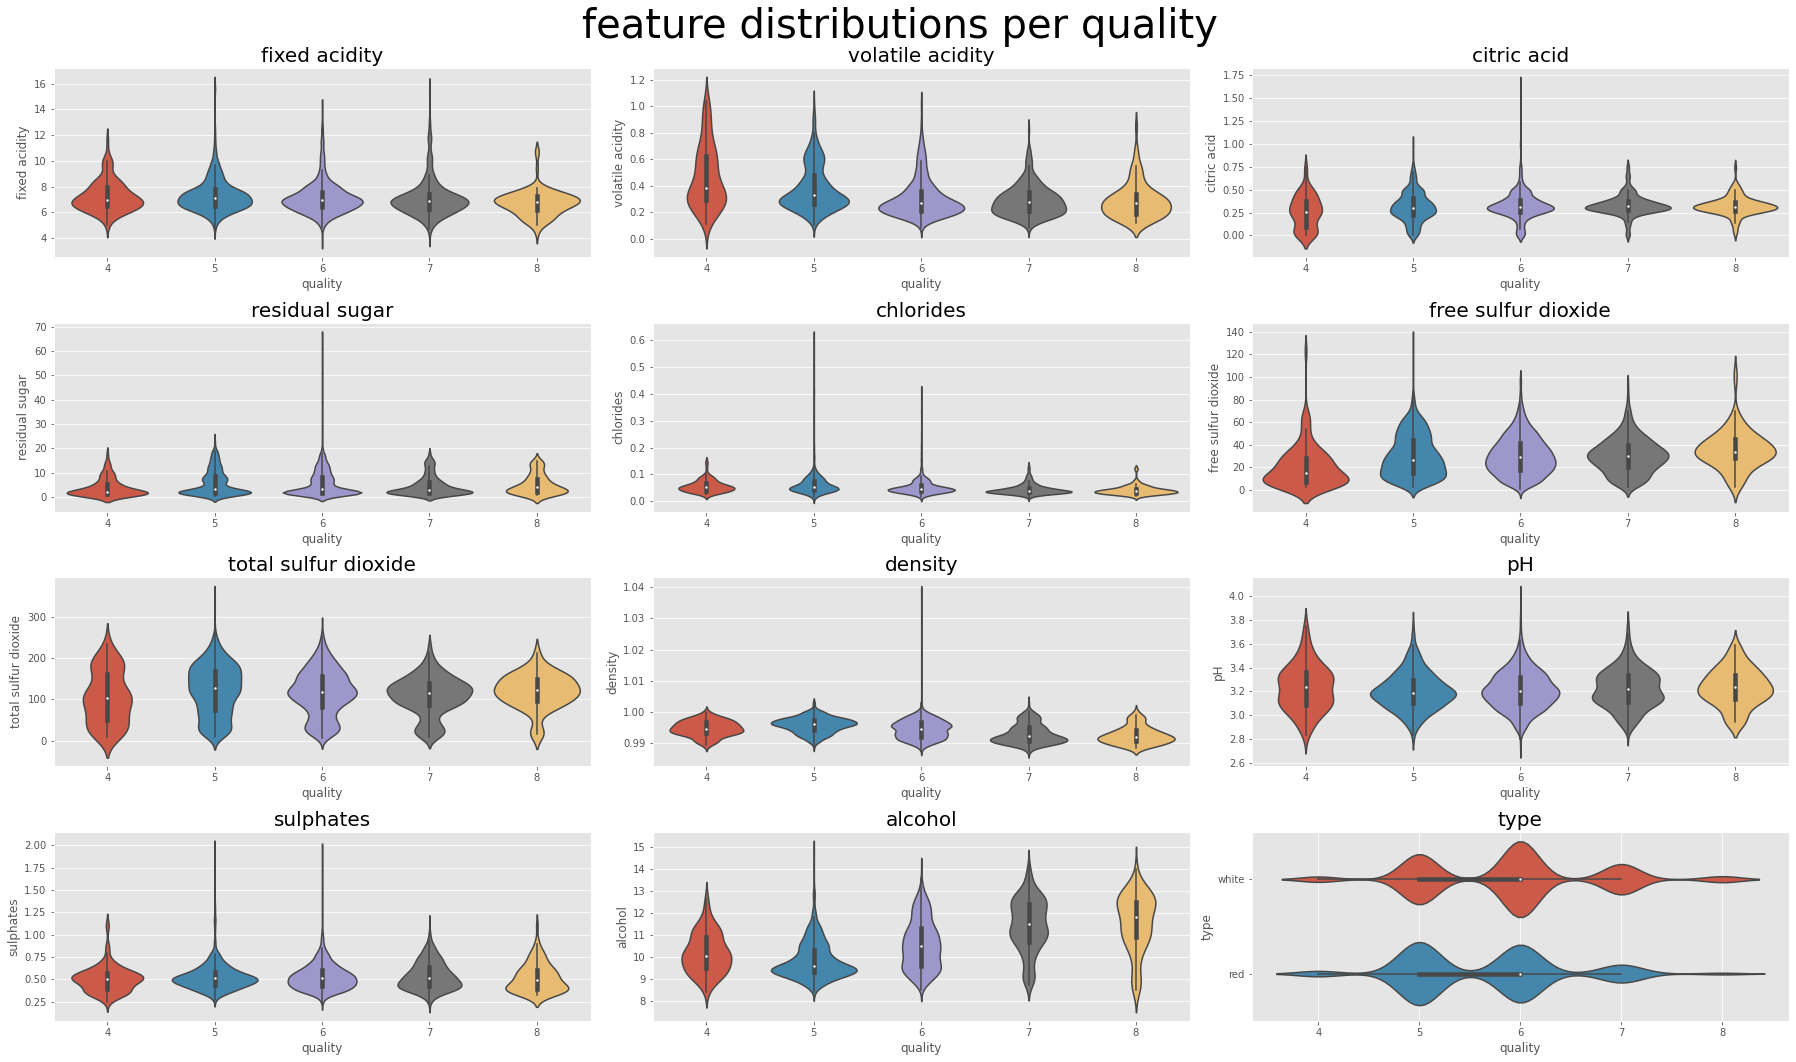

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(25, 15))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns[1:]):
    sns.violinplot(x= 'quality', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout()
plt.show()

# 특정 feature에서는 품질이 올라갈수록 값이 상승하거나 하락하는 추세를 보입니다. (fixed acidity, volatile acidity 등)

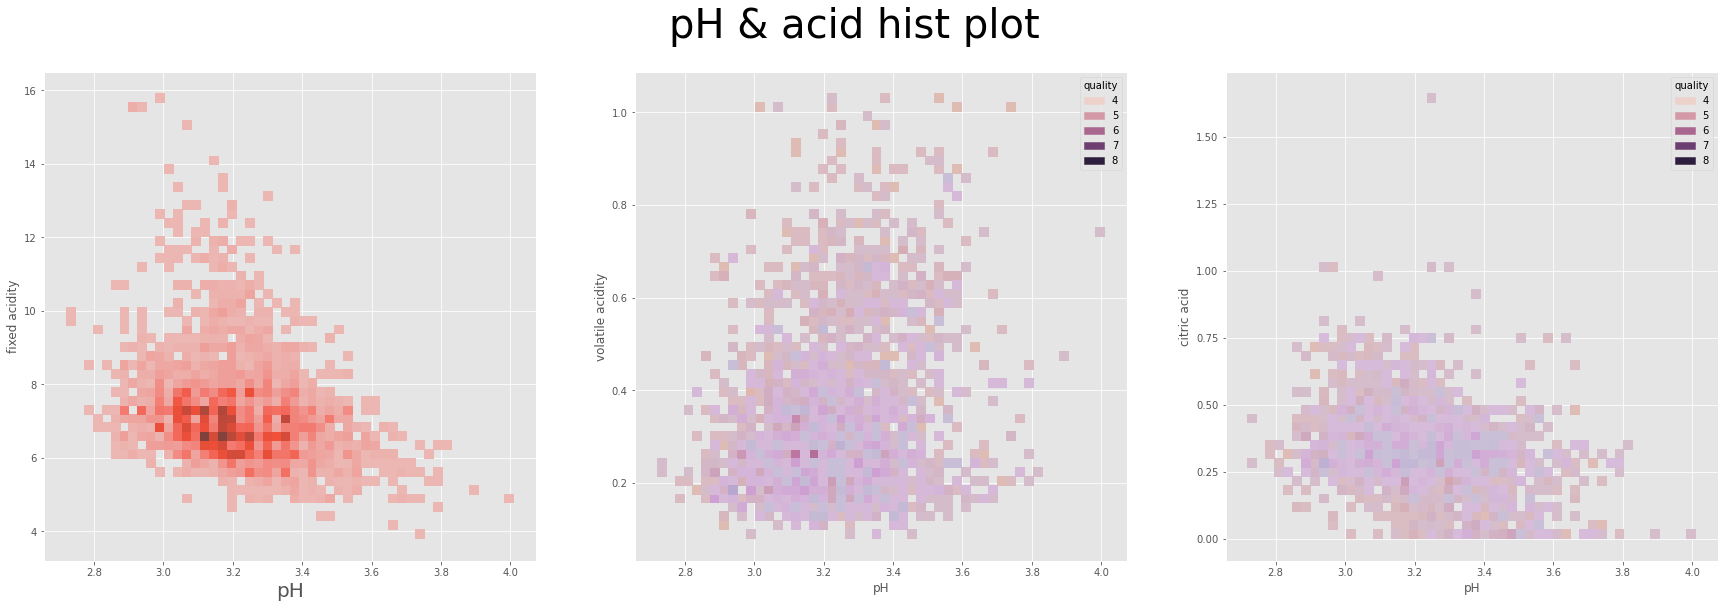

In [12]:
sns.color_palette("Set2")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 9))


scatter_fix = sns.histplot(data=train, x='pH', y='fixed acidity', bins=50, ax= ax1)
scatter_volatile =  sns.histplot(data=train, x='pH', y='volatile acidity', bins=50, ax= ax2, hue='quality')
scatter_citric = sns.histplot(data=train, x='pH', y='citric acid', bins=50, ax=ax3, hue='quality')
scatter_fix.set_xlabel('pH', fontsize=20)

ax1.title
fig.suptitle('pH & acid hist plot', fontsize = 40)

plt.show()

# ph농도와 acid들간의 관계가 명확해보이진 않습니다

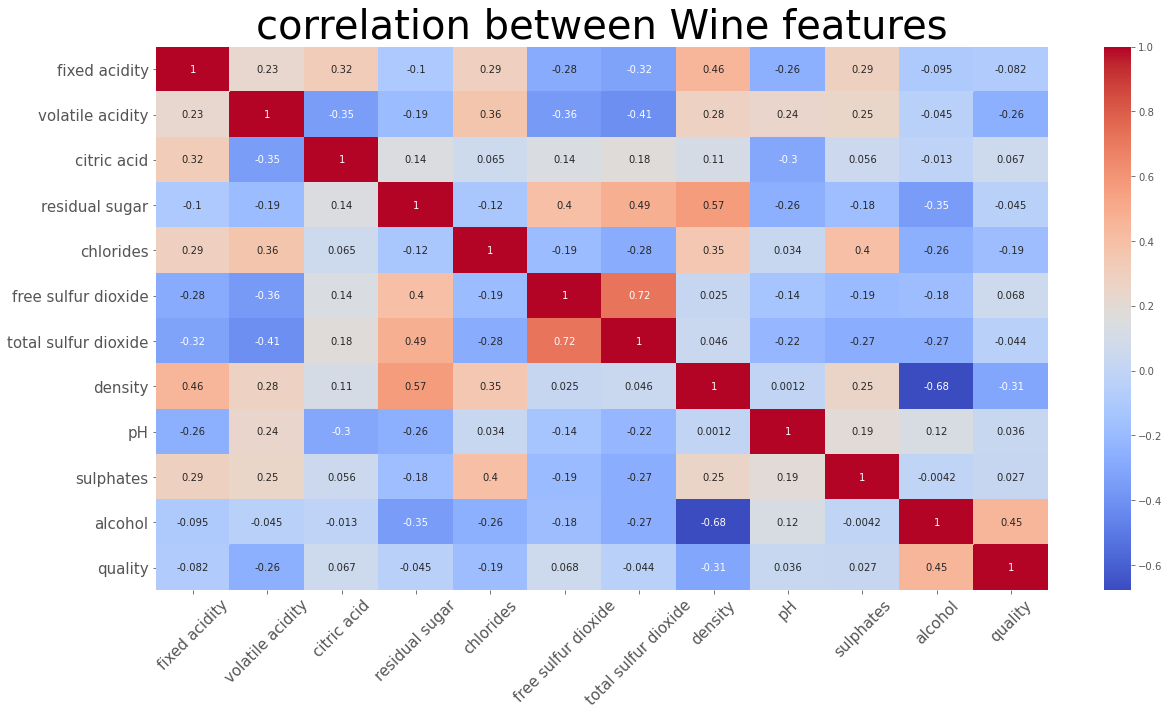

In [13]:
#상관관계

plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between Wine features', fontsize=40)
plt.show()

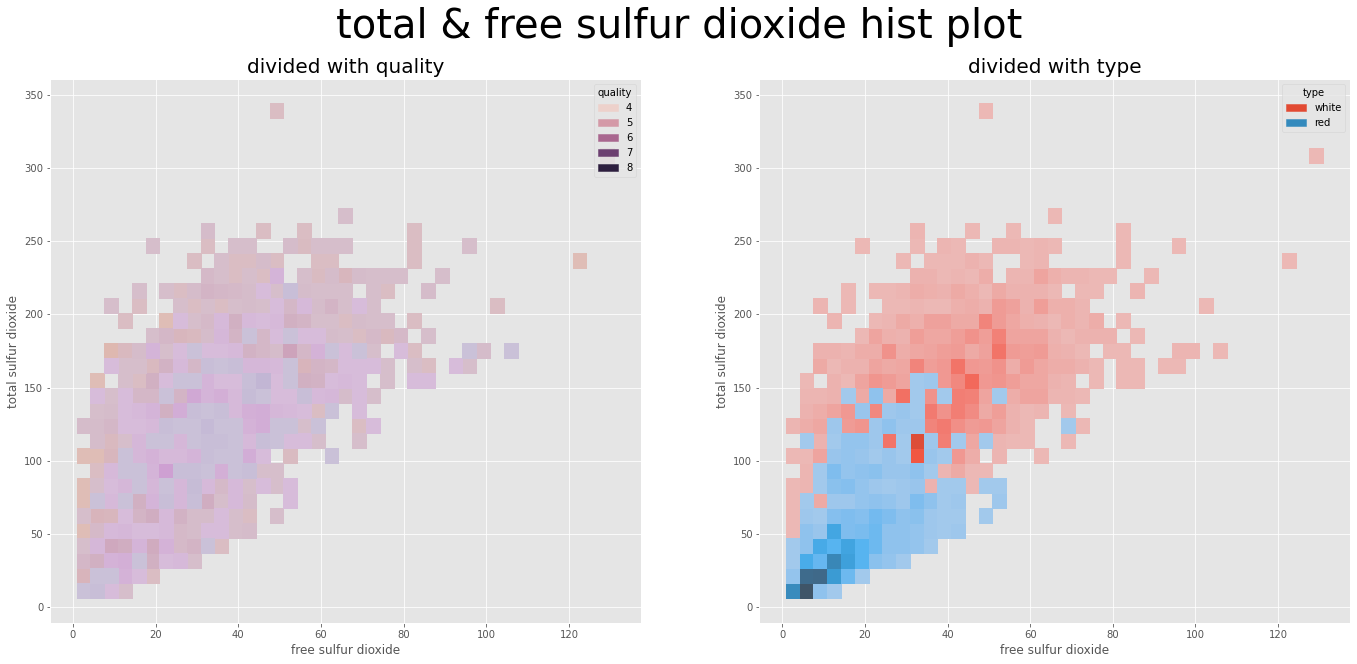

In [14]:
# 강한 양의 상관관계를 갖는 feature쌍(free sulfur dioxide, total sulfur dioxide)
# 강한 음의 상관 관계를 갖는 feature쌍(density, alcohol)을 시각화

fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'free sulfur dioxide', y= 'total sulfur dioxide', ax= ax, hue= 'quality',data= train)
    else:
        sns.histplot(x= 'free sulfur dioxide', y= 'total sulfur dioxide', ax= ax, hue= 'type',data= train)
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('total & free sulfur dioxide hist plot', fontsize= 40)
plt.show()

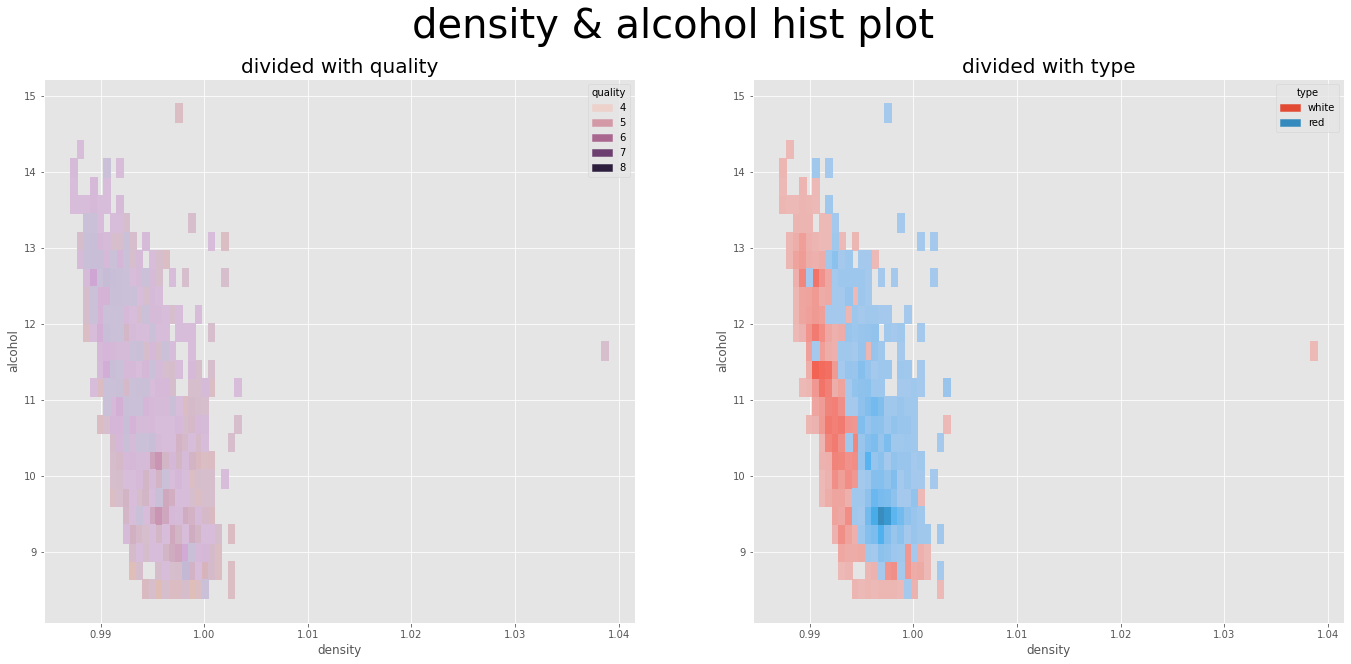

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, hue= 'quality',data= train)
    else:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, hue= 'type',data= train)
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()

# density와 alcohol은 비교적 뚜렷한 음의 상관관계를 보일 줄 알았지만 그래프에선 잘 보이지 않는군요

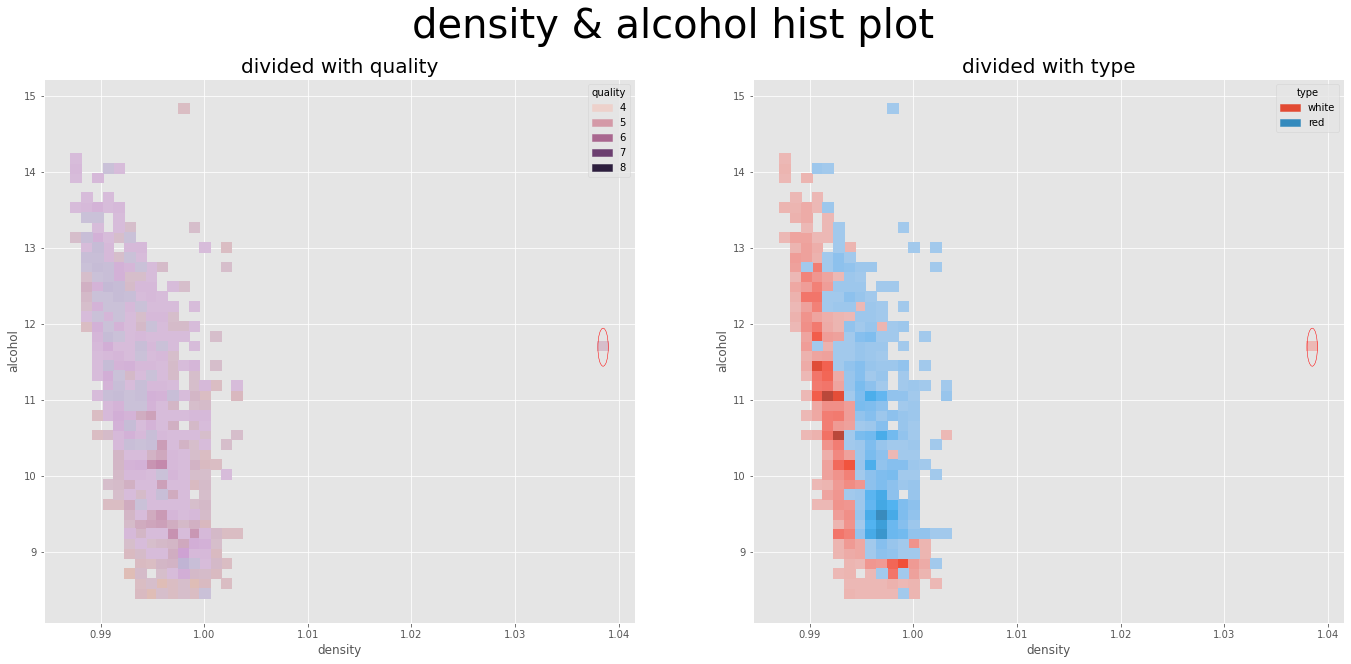

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', bins=50, ax= ax, hue= 'quality',data= train)
        ax.add_patch(patches.Ellipse((1.0385, 11.7), .001, .5, color='r', fill=False))
    else:
        sns.histplot(x= 'density', y= 'alcohol', bins=50, ax= ax, hue= 'type',data= train)
        ax.add_patch(patches.Ellipse((1.0385, 11.7), .001, .5, color='r', fill=False))
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()

#이상치 표시

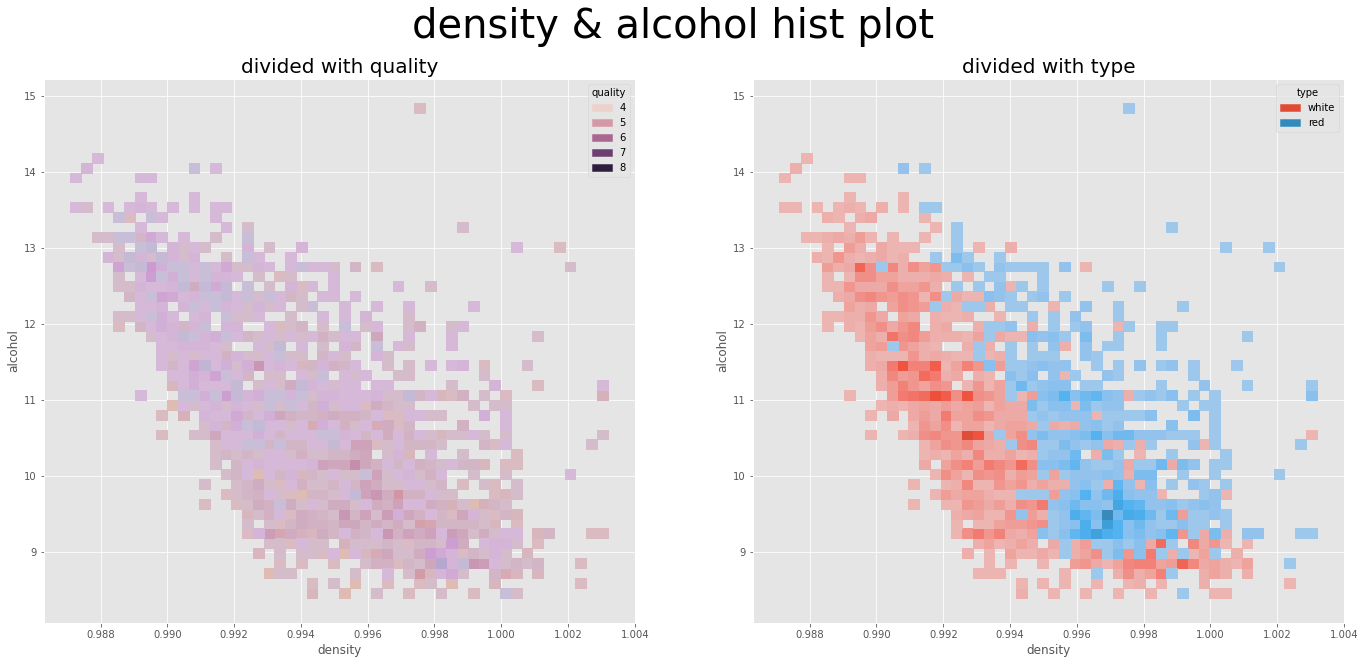

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(2.33 * 10, 1 * 10))

for i, ax in enumerate(axes):
    if i == 0:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'quality',data= train.drop(train[train['density'] == max(train['density'])].index))
    else:
        sns.histplot(x= 'density', y= 'alcohol', ax= ax, bins=50, hue= 'type',data= train.drop(train[train['density'] == max(train['density'])].index))
        
axes[0].set_title('divided with quality', fontsize=20)
axes[1].set_title('divided with type', fontsize=20)
fig.suptitle('density & alcohol hist plot', fontsize= 40)
plt.show()